## Introduction to linear regression

In the story of Moneyball, the spotlight shines on the Oakland Athletics, a team determined to uncover the secret to success in baseball despite their limited budget. They embraced a groundbreaking approach, valuing overlooked statistics like a player's on-base ability, revealing a game-changing strategy that allowed them to assemble a competitive team without breaking the bank.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

#### Data

- Loading data of 2011 season

In [219]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mlb11 = pd.read_csv("mlb11.csv")

In [220]:
mlb11.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


- In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the newer variables on your own.

#### Q1. What type of plot would you use to display the relationship between runs and one of the other numerical variables? Plot this relationship using the variable at_bats as the predictor. Does the relationship look linear? If you knew a team's at_bats, would you be comfortable using a linear model to predict the number of runs?

Ans :- I would use a scatterplot to show the relationship between “runs” and “at bats.” The relationship looks fairly linear.

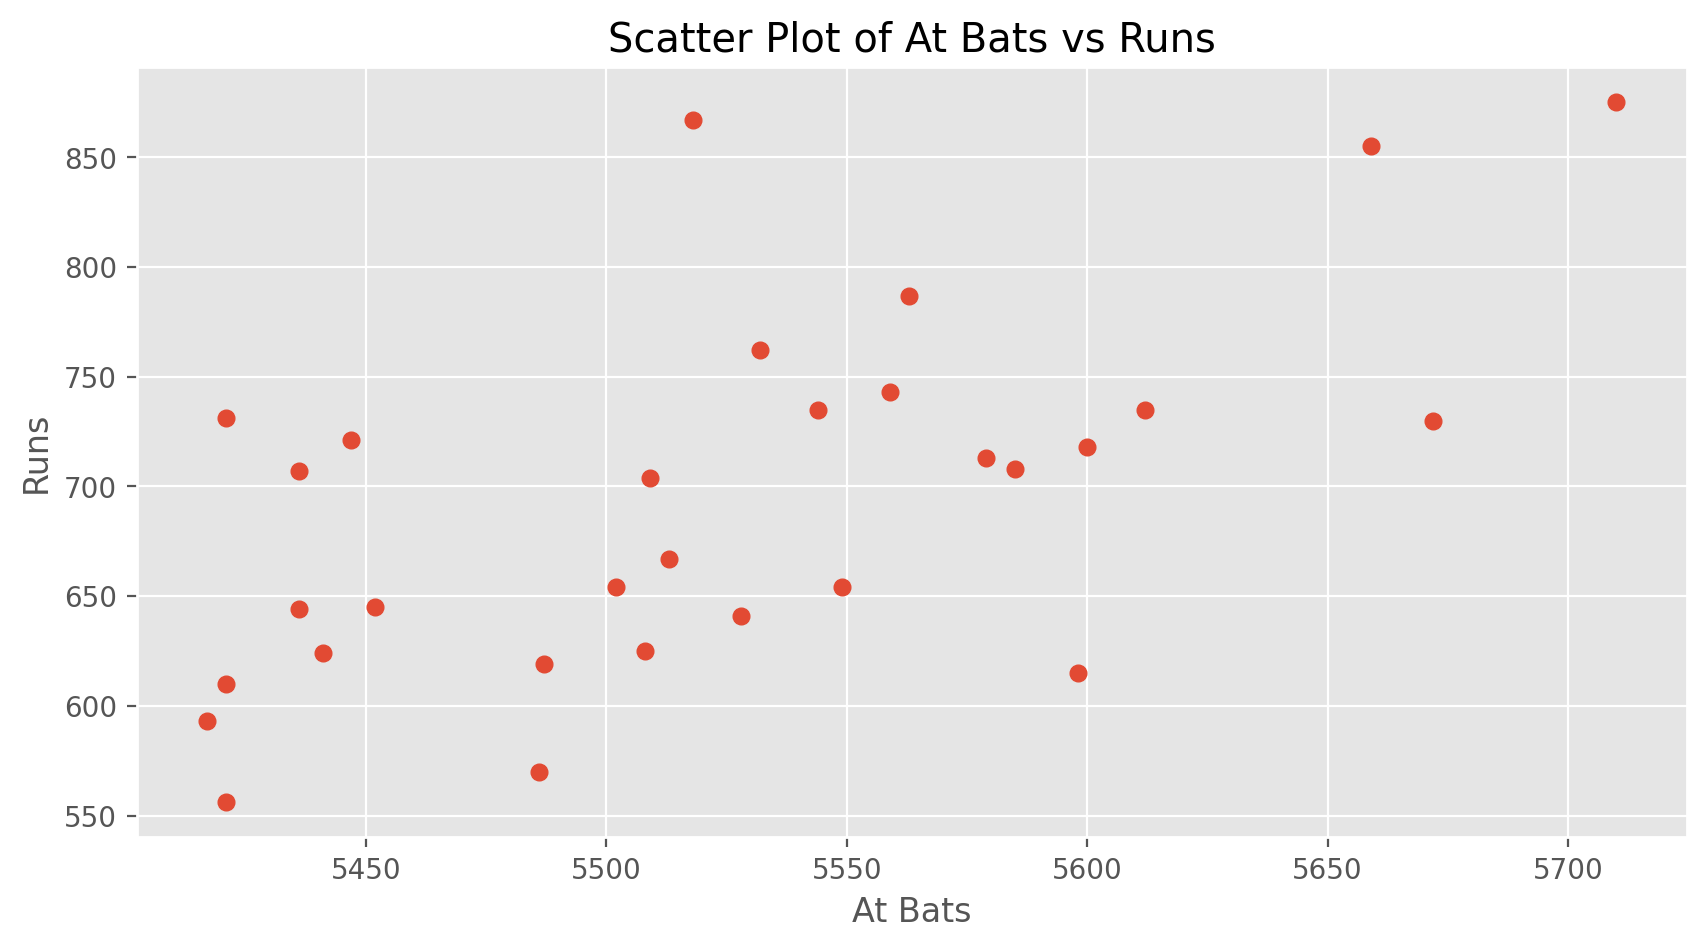

In [221]:
# Plotting

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.xlabel('At Bats')
plt.ylabel('Runs')
plt.title('Scatter Plot of At Bats vs Runs')
plt.show()

#### Correlation Coefficent

The correlation coefficient is a statistical measure that quantifies the degree to which two variables are related or move together. It provides a measure of the strength and direction of a linear relationship between two variables. The correlation coefficient is denoted by 
- r and can take values between -1 and 1.

Here are the key interpretations of the correlation coefficient:

- Positive Correlation (r > 0) As one variable increases, the other variable tends to also increase. The closer r is to 1, the stronger the positive correlation.

- Negative Correlation (r < 0 ): As one variable increases, the other variable tends to decrease. The closer r is to -1, the stronger the negative correlation.

- No Correlation (r=0): There is no linear relationship between the two variables. However, it's important to note that the absence of a linear relationship does not imply the absence of other types of relationships.

In [222]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

### Sum of squared residuals
- Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as runs and at_bats above.

#### Q2 Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.Recall that the difference between the observed values and the values predicted by the line are called residuals. Note that the data set has 30 observations in total, hence there are 30 residuals.



Ans:- The plot showed that there is a positive correlation between runs and at bats. As at bats increases so does the amount of runs. The correlation is also fairly strong. The correlation coefficient we calculated is 0.611 which is pretty strong. There do seem to be a few outliers present. For example the runs for approximately 5525 at bats was abnormally high.

To visualize the residuals of a linear regression, we can use residplot() function from seaborn:

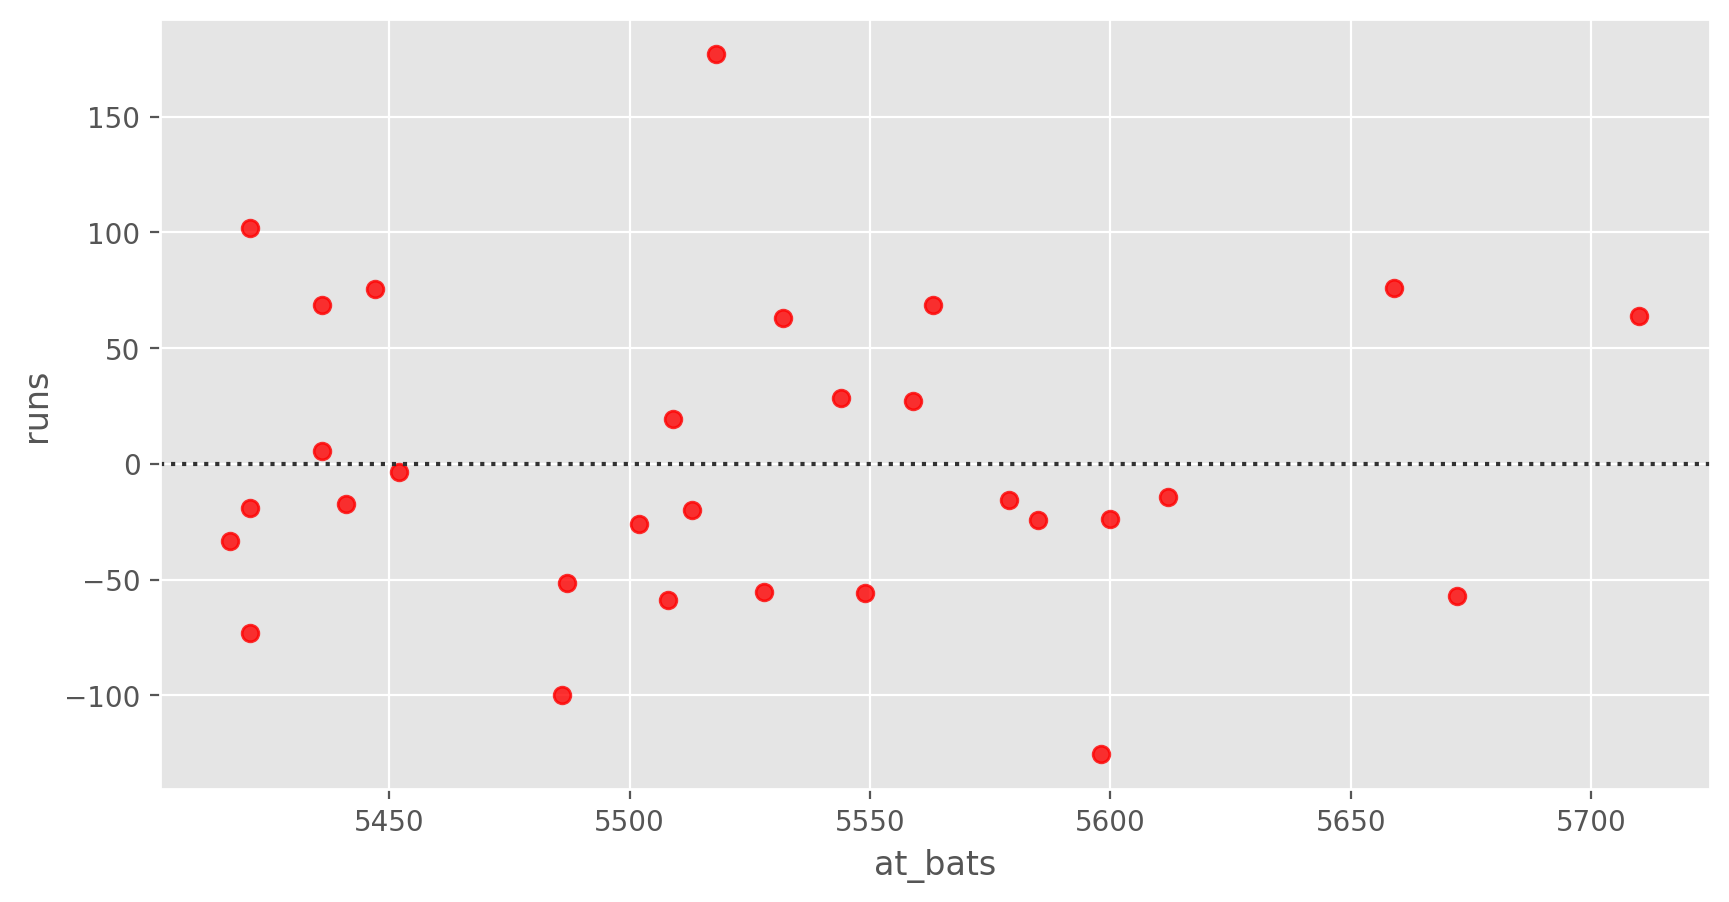

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'at_bats': mlb11['at_bats'],
    'runs': mlb11['runs']
}
mlb11 = pd.DataFrame(data)

# Plotting
sns.residplot(x=mlb11['at_bats'], y=mlb11['runs'], color='red')
plt.show()


### The linear model

In order to determine the best fit line we can use `statsmodel', a very useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [224]:
import statsmodels.api as sm

formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           0.000339
Time:                        14:33:46   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

- Let's print the intercept and slope values.

In [225]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = -2789.2428854422524
Slope = 0.6305499928382832


Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

Y = - 2789.2429 + 0.6305*at_bats

- One last piece of information we will discuss from the summary output is the Multiple R-squared,. The Rsquared value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.

In [226]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.3728653901868054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


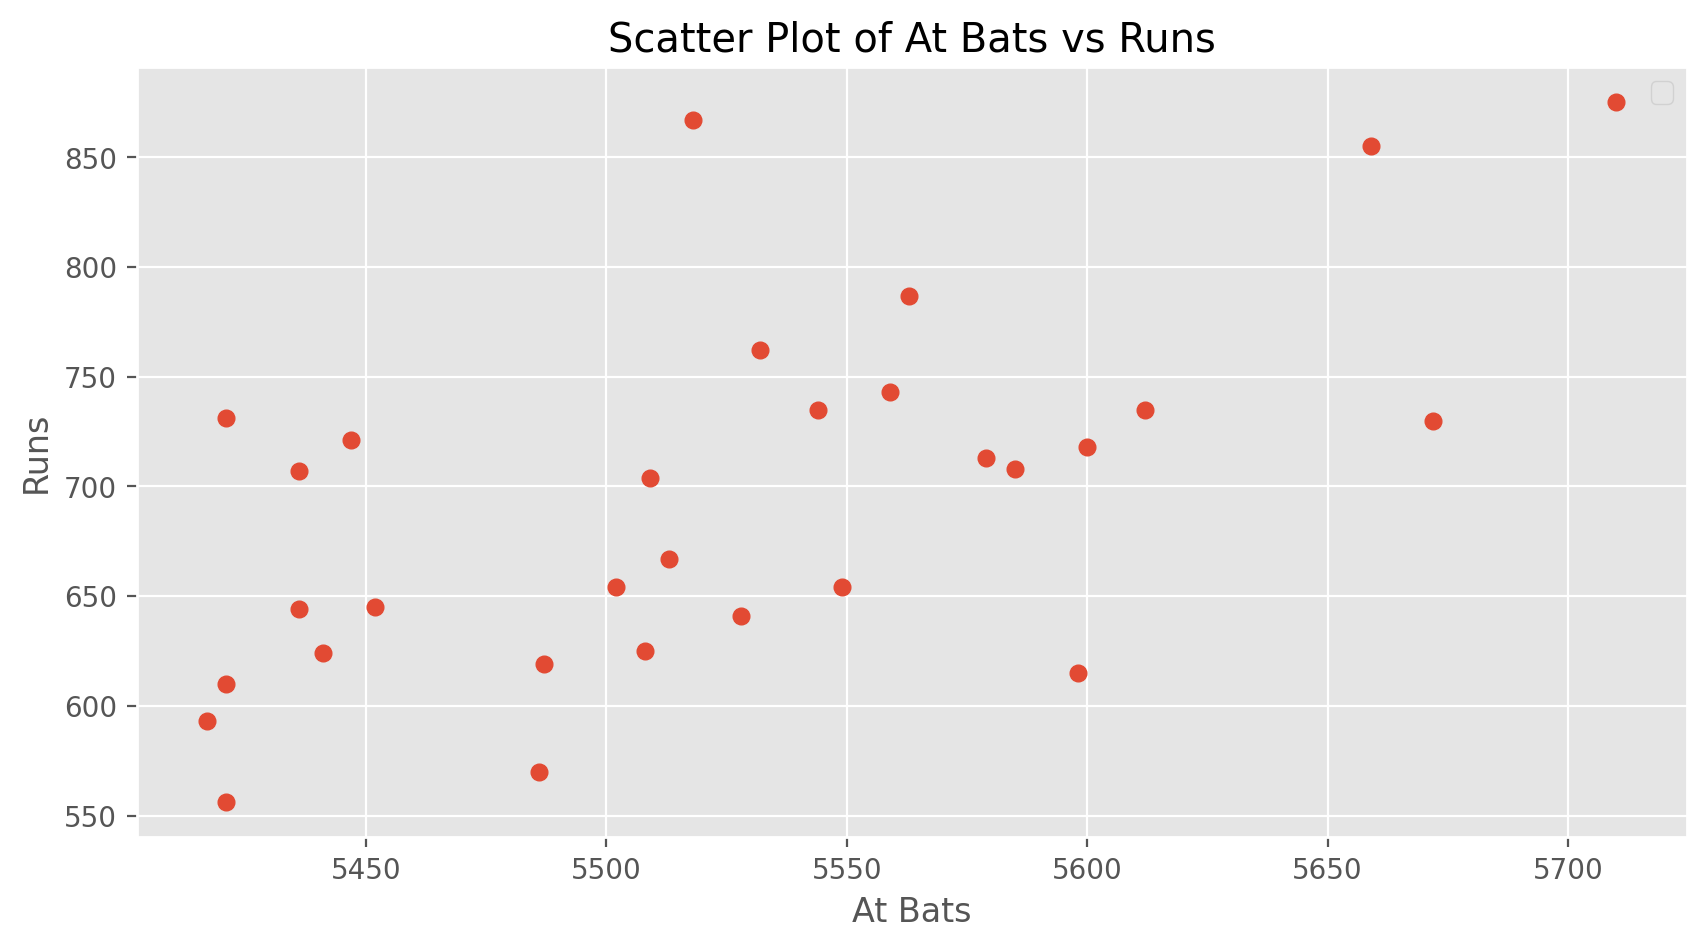

In [227]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'at_bats': mlb11['at_bats'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['at_bats']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['at_bats'], mlb11['runs'])
#plt.plot(mlb11['at_bats'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('At Bats')
plt.ylabel('Runs')
plt.title('Scatter Plot of At Bats vs Runs')
plt.grid(True)

# Plot residual lines
# for i in range(len(mlb11)):
#     plt.plot([mlb11['at_bats'][i], mlb11['at_bats'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

plt.legend()
plt.show()
#This code not only includes the scatter plot and the best-fit line but also adds dashed lines connecting each data point to the corresponding point on the best-fit line, effectively illustrating the residuals. The residuals are the vertical distances between the data points and the best-fit line.




##### Q3 Fit a new model that uses homeruns to predict runs. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?

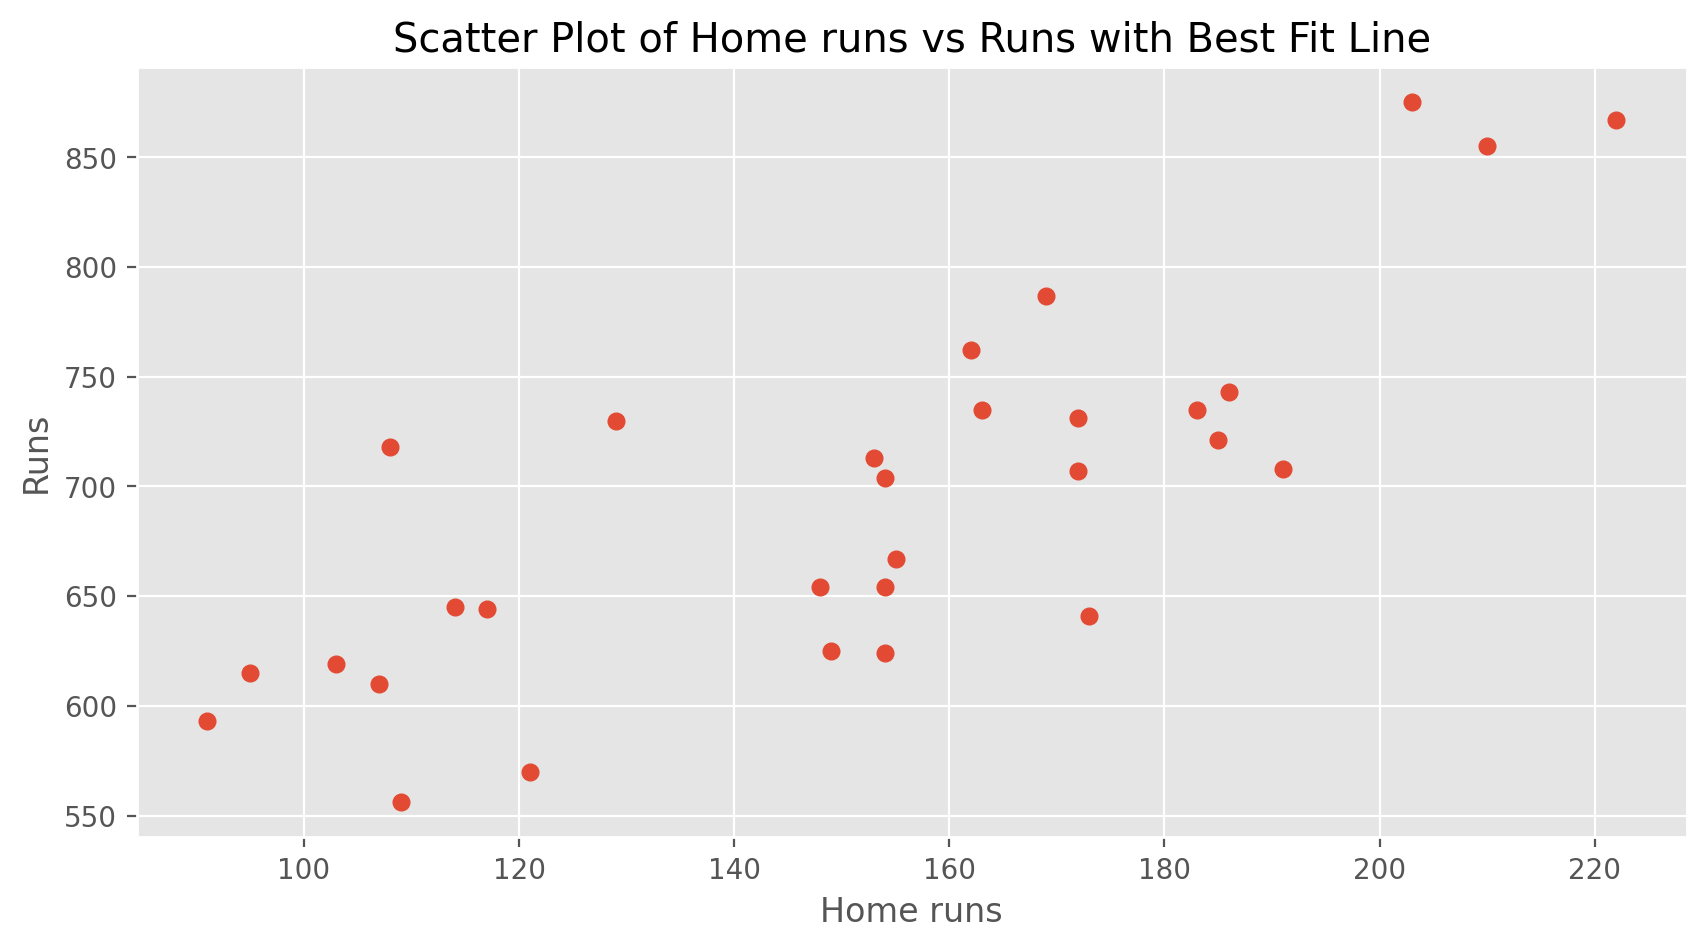

In [228]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'home_runs': mlb11['homeruns'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['home_runs']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['home_runs'], mlb11['runs'])
# plt.plot(mlb11['home_runs'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Home runs')
plt.ylabel('Runs')
plt.title('Scatter Plot of Home runs vs Runs with Best Fit Line')
plt.grid(True)

# # Plot residual lines
# for i in range(len(mlb11)):
#     plt.plot([mlb11['home_runs'][i], mlb11['home_runs'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

#plt.legend()
plt.show()
#This code not only includes the scatter plot and the best-fit line but also adds dashed lines connecting each data point to the corresponding point on the best-fit line, effectively illustrating the residuals. The residuals are the vertical distances between the data points and the best-fit line.



In [229]:

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for homeruns: {model.coef_[0]}')
# Calculate correlation
correlation = mlb11['home_runs'].corr(mlb11['runs'])

print(f'Correlation between homeruns and runs: {correlation}')

Intercept: 415.23888491572245
Coefficient for homeruns: 1.8345416196239737
Correlation between homeruns and runs: 0.7915576855582183


linear line Equation ( Y = 1.8345416196239737*homeruns + 415.23888491572245)

The slope lets us know that there is a positive correlation between the two variables that is pretty strong.

## Prediction and prediction errors
- Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Let's plot at_bats and runs on a scatter plot.

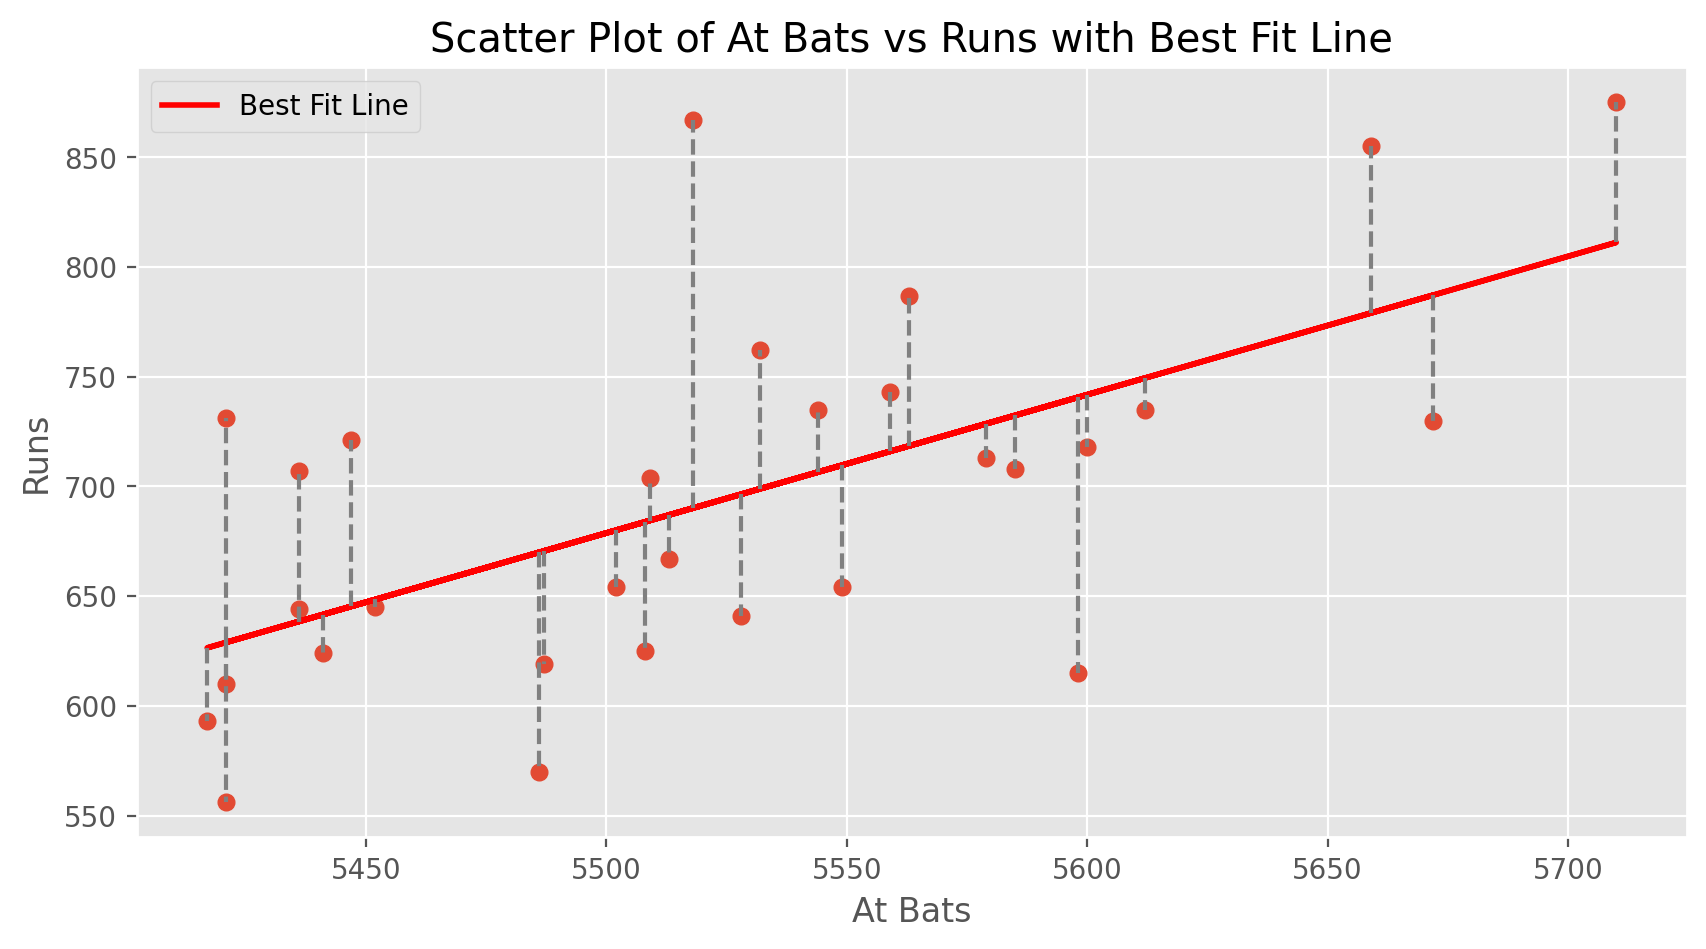

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'at_bats': mlb11['at_bats'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['at_bats']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(mlb11['at_bats'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('At Bats')
plt.ylabel('Runs')
plt.title('Scatter Plot of At Bats vs Runs with Best Fit Line')
plt.grid(True)

#Plot residual lines
for i in range(len(mlb11)):
    plt.plot([mlb11['at_bats'][i], mlb11['at_bats'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

plt.legend()
plt.show()



##### Q4. If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

Ans :- 
- Y-hat = - 2789.2429 + 0.6305*at_bats is our linear equation
- Y-hat = - 2789.2429 + 0.6305*5578
- Y-hat = 727.6861

In [231]:
mlb11[mlb11['at_bats'] > 5570].sort_values('at_bats').head(1)

,at_bats,runs
15,5579,713


The manager would predict 727 runs. This would be an overestimate as there was a data point for  5579 at bats which gave 713 runs. This means there is a residual of -14

#### Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

Linearity: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. at-bats.

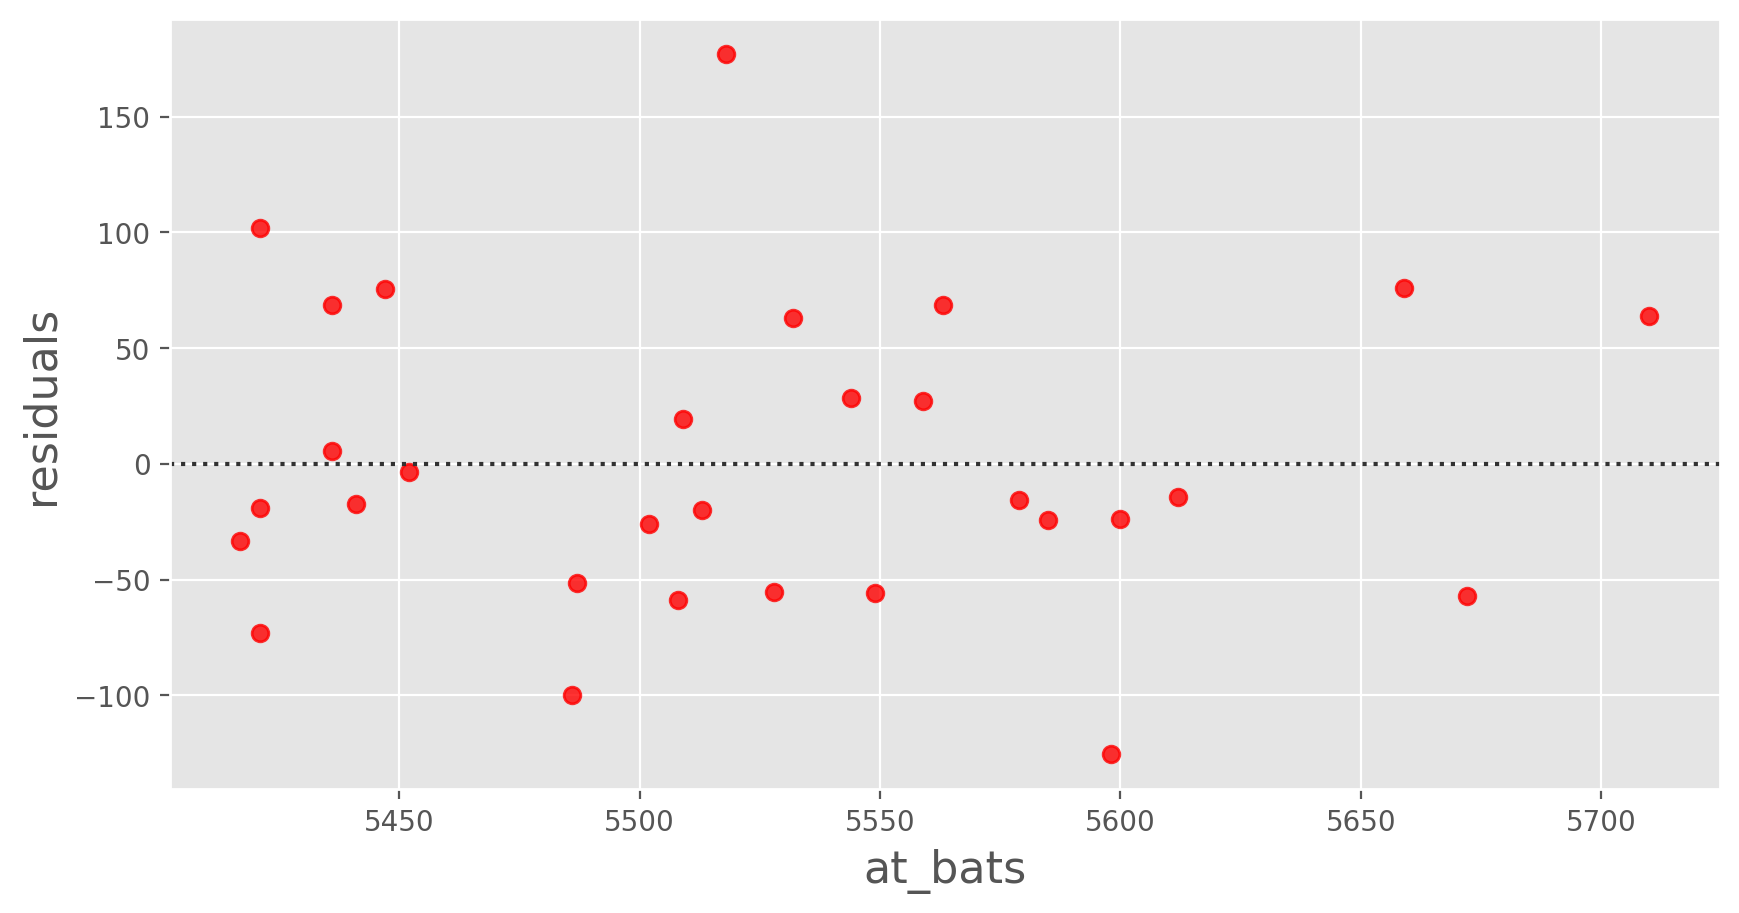

In [232]:
import seaborn as sns

sns.residplot(x=mlb11['at_bats'], y=residuals, color='red')
plt.xlabel('at_bats', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

#### Q5. Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?

Ans :- There doesn't seem to be a clear pattern in the distribution, as the numbers seem randomly scattered around the dashed line, showing an uneven pattern with a hint of skewness. However, it can still be interpreted as exhibiting a linear relationship.

To check this condition, we can look at a histogram.

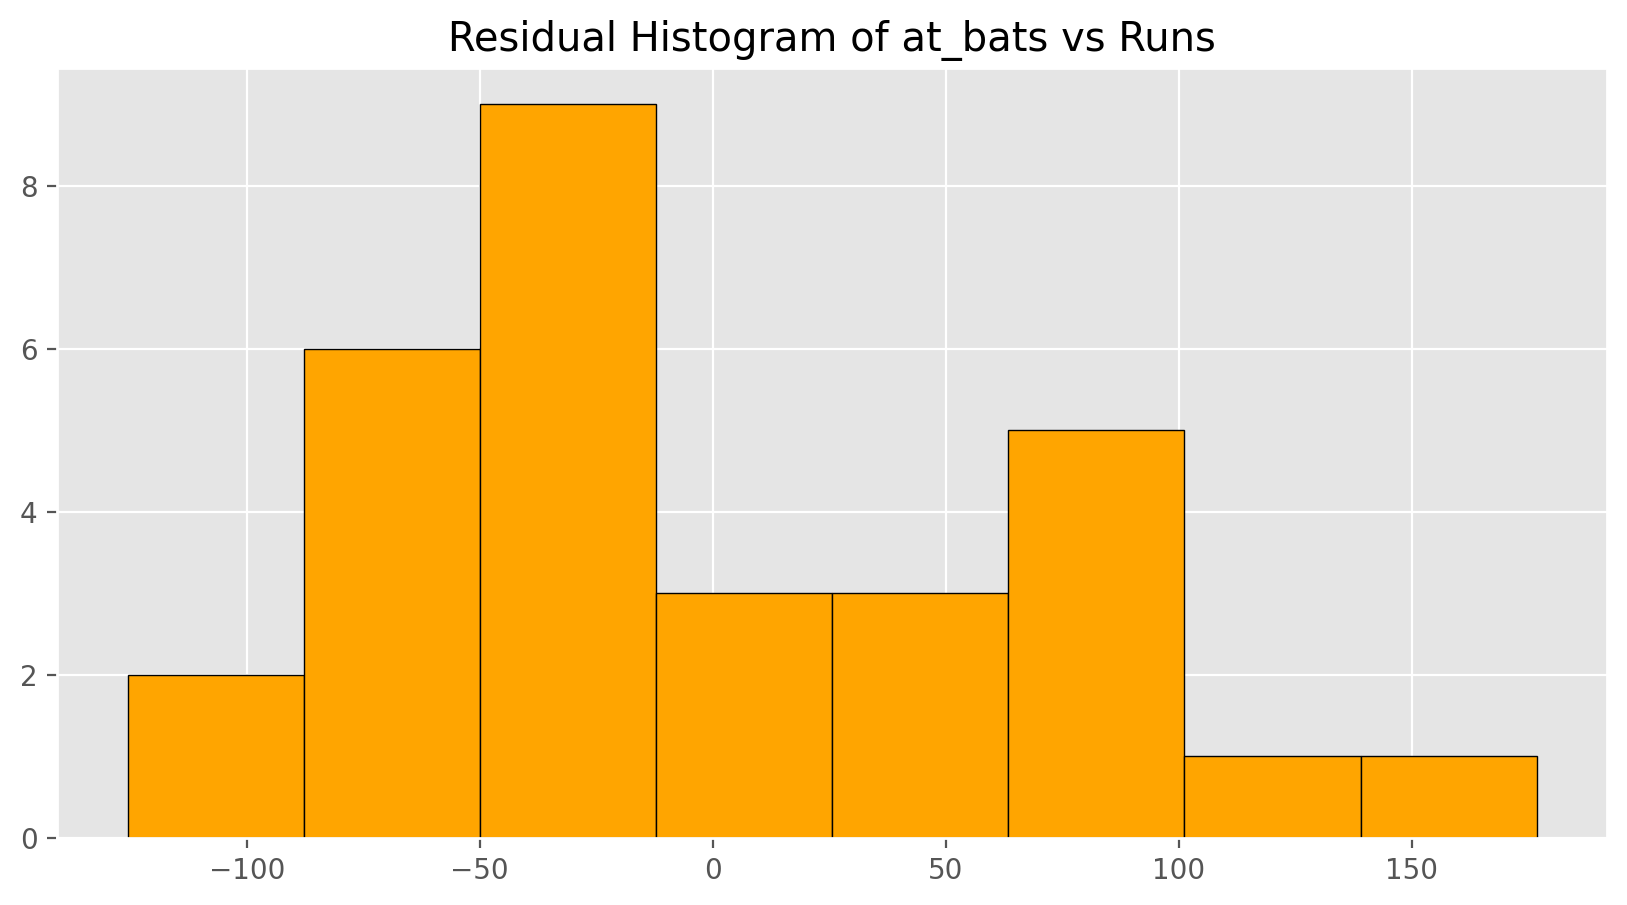

In [233]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8, edgecolor = "black", color= 'orange')
plt.title("Residual Histogram of at_bats vs Runs")
plt.show();

To check the normal probability plot of the residuals.

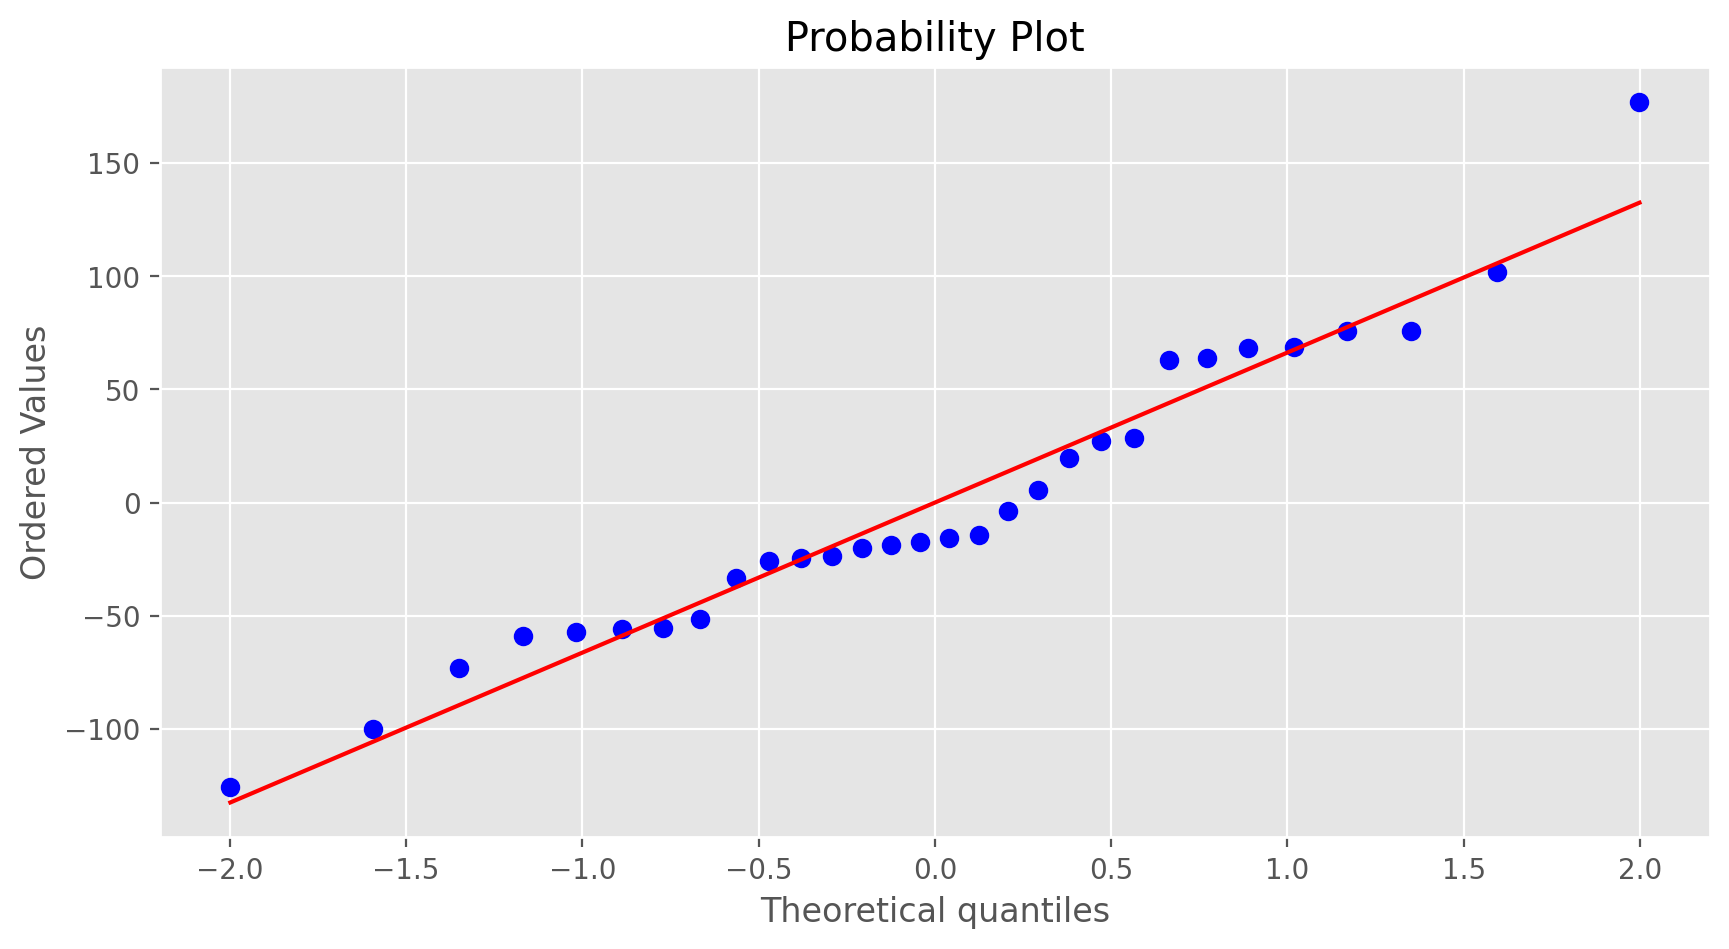

In [234]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

#### Q6. Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?

- Ans :- Both plots show that the nearly normal residual condition appears to be met.

#### Q7. Based on the plot in (1), does the constant variability condition appear to be met?

- Ans :- Yes, the constant variability condition appears to be met

# Do Our Own

#### Q1.Choose another traditional variable from mlb11 that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

ANs :- I am taking batting average( bat_avg) which will be a good predictor variable which will be good as pridicting runs

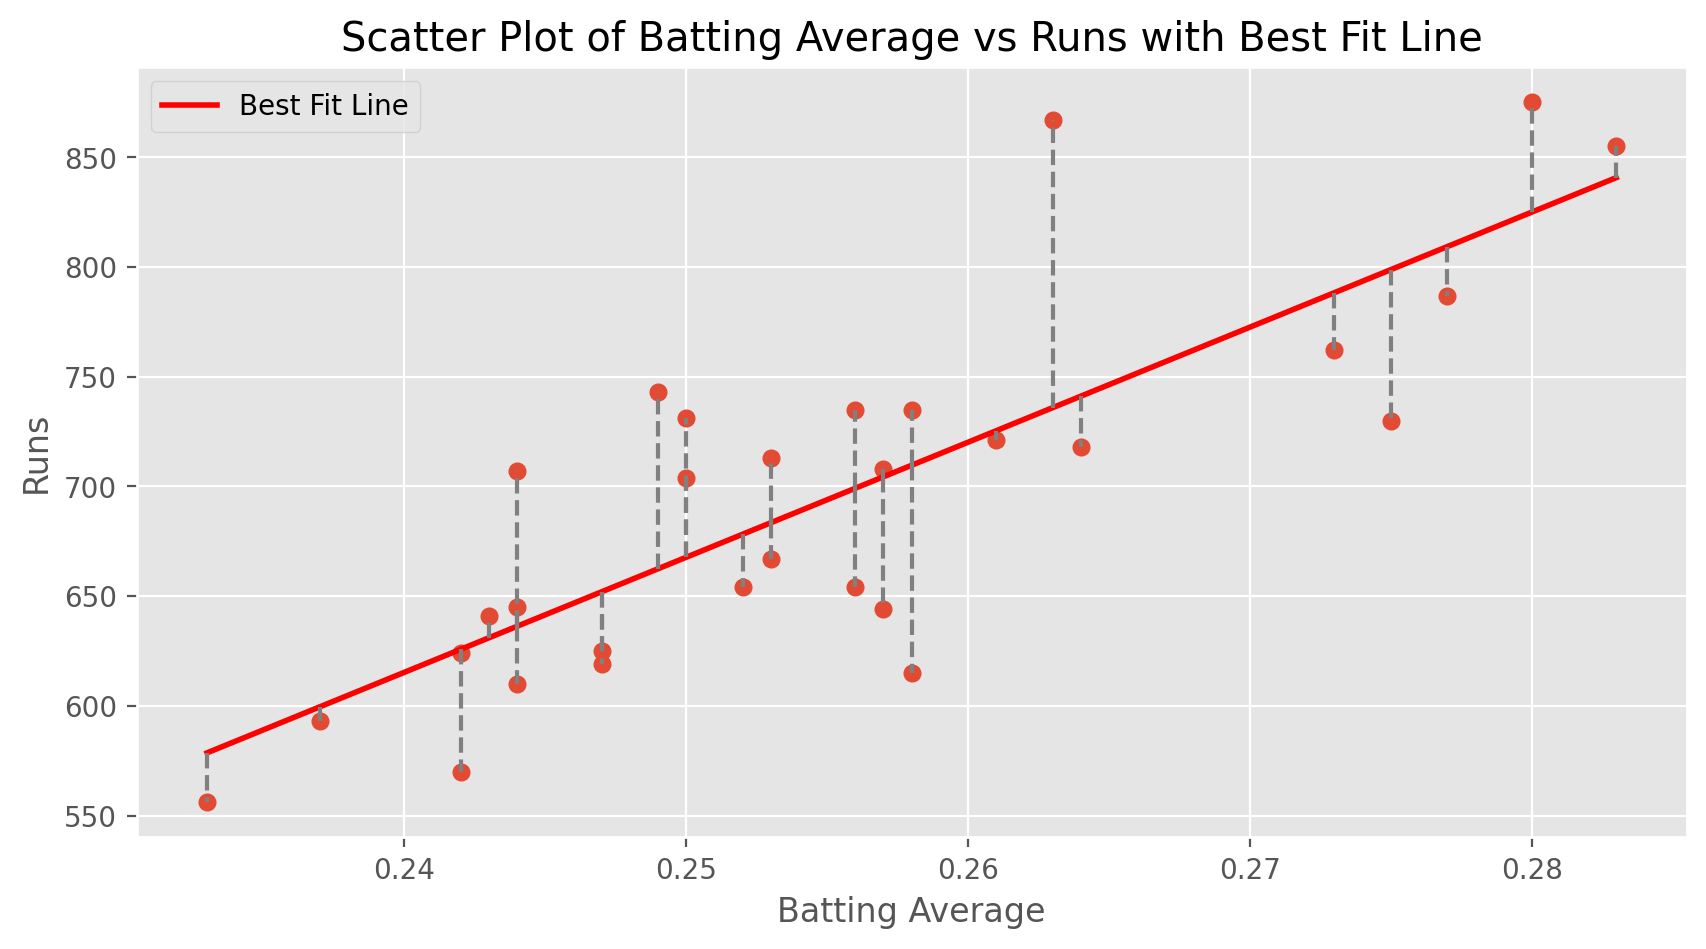

In [235]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'bat_avg': mlb11['bat_avg'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['bat_avg']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['bat_avg'], mlb11['runs'])
plt.plot(mlb11['bat_avg'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Batting Average')
plt.ylabel('Runs')
plt.title('Scatter Plot of Batting Average vs Runs with Best Fit Line')
plt.grid(True)

#Plot residual lines
for i in range(len(mlb11)):
    plt.plot([mlb11['bat_avg'][i], mlb11['bat_avg'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

plt.legend()
plt.show()

In [236]:
correlation = mlb11['bat_avg'].corr(mlb11['runs'])

In [237]:
print(F"Correlation :{correlation}")
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for Bating Average: {model.coef_[0]}')


Correlation :0.8099858854615081
Intercept: -642.8189333031361
Coefficient for Bating Average: 5242.229079379456


Linear line Equation
- y-hat = -642.82 + 5242.23 * bat_avg

From the scatter plot and correlation value we can conclude that batting average and runs have strong positive correlation and data points are having strong positive linear relation

#### Q2.How does this relationship compare to the relationship between runs and at_bats? Use the R^2 values from the two model summaries to compare. Does your variable seem to predict runs better than at_bats? How can you tell?

In [238]:
import statsmodels.api as sm
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'at_bats': mlb11['at_bats'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ at_bats (m1):  {round(model_fitted.rsquared * 100, 2) }% ")


data = {
    'bat_avg': mlb11['bat_avg'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ bat_avg"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ batting Average (m2):  {round(model_fitted.rsquared * 100, 2) }% ")

Rsquared for runs ~ at_bats (m1):  37.29% 
Rsquared for runs ~ batting Average (m2):  65.61% 


Ans:- 
- Model m1, representing the relationship between runs and at-bats, produces an R-squared value of 37.29%.
- Model m2, depicting the relationship between runs and batting average, achieves a higher R-squared value of 62.66%.
- The higher R-squared value in m2 suggests that batting average provides a more effective prediction of runs compared to at-bats.
- In summary, the variable bat_avg demonstrates superior predictive power for runs in comparison to the at-bats variable.

#### Q3.Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts runs? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).

In [239]:
import statsmodels.api as sm
mlb11 = pd.read_csv("mlb11.csv")

data = {
    'bat_avg': mlb11['bat_avg'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ bat_avg"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ batting Average (m2):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['bat_avg'].corr(mlb11['runs'])}")

data = {
    'homeruns': mlb11['homeruns'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ homeruns"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ homeruns (m3):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['homeruns'].corr(mlb11['runs'])} ")
data = {
    'hits': mlb11['hits'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ hits"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ hits (m4):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['hits'].corr(mlb11['runs'])} ")


data = {
    'strikeouts': mlb11['strikeouts'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ strikeouts"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ strikeouts (m5):  {round(model_fitted.rsquared * 100, 2) }%  and Correlation : {mlb11['strikeouts'].corr(mlb11['runs'])} ")

data = {
    'stolen_bases': mlb11['stolen_bases'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ stolen_bases"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ stolen_bases (m6):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['stolen_bases'].corr(mlb11['runs'])} ")

data = {
    'wins': mlb11['wins'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ wins"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ wins (m7):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['wins'].corr(mlb11['runs'])}")



Rsquared for runs ~ batting Average (m2):  65.61% and Correlation : 0.8099858854615081
Rsquared for runs ~ homeruns (m3):  62.66% and Correlation : 0.7915576855582183 
Rsquared for runs ~ hits (m4):  64.19% and Correlation : 0.8012108132317111 
Rsquared for runs ~ strikeouts (m5):  16.94%  and Correlation : -0.41153120445029745 
Rsquared for runs ~ stolen_bases (m6):  0.29% and Correlation : 0.05398141037962953 
Rsquared for runs ~ wins (m7):  36.1% and Correlation : 0.6008087711133059


Ans :- Upon analyzing the summary statistics for the next five variables, it becomes evident that among them, batting average (bat_avg) emerges as the most influential predictor for runs. This conclusion is drawn from both the high R-squared value and a strong correlation observed, indicating that bat_avg significantly contributes to explaining the variance in runs.

#### Graphical Representation of relation between Runs and Batting Average

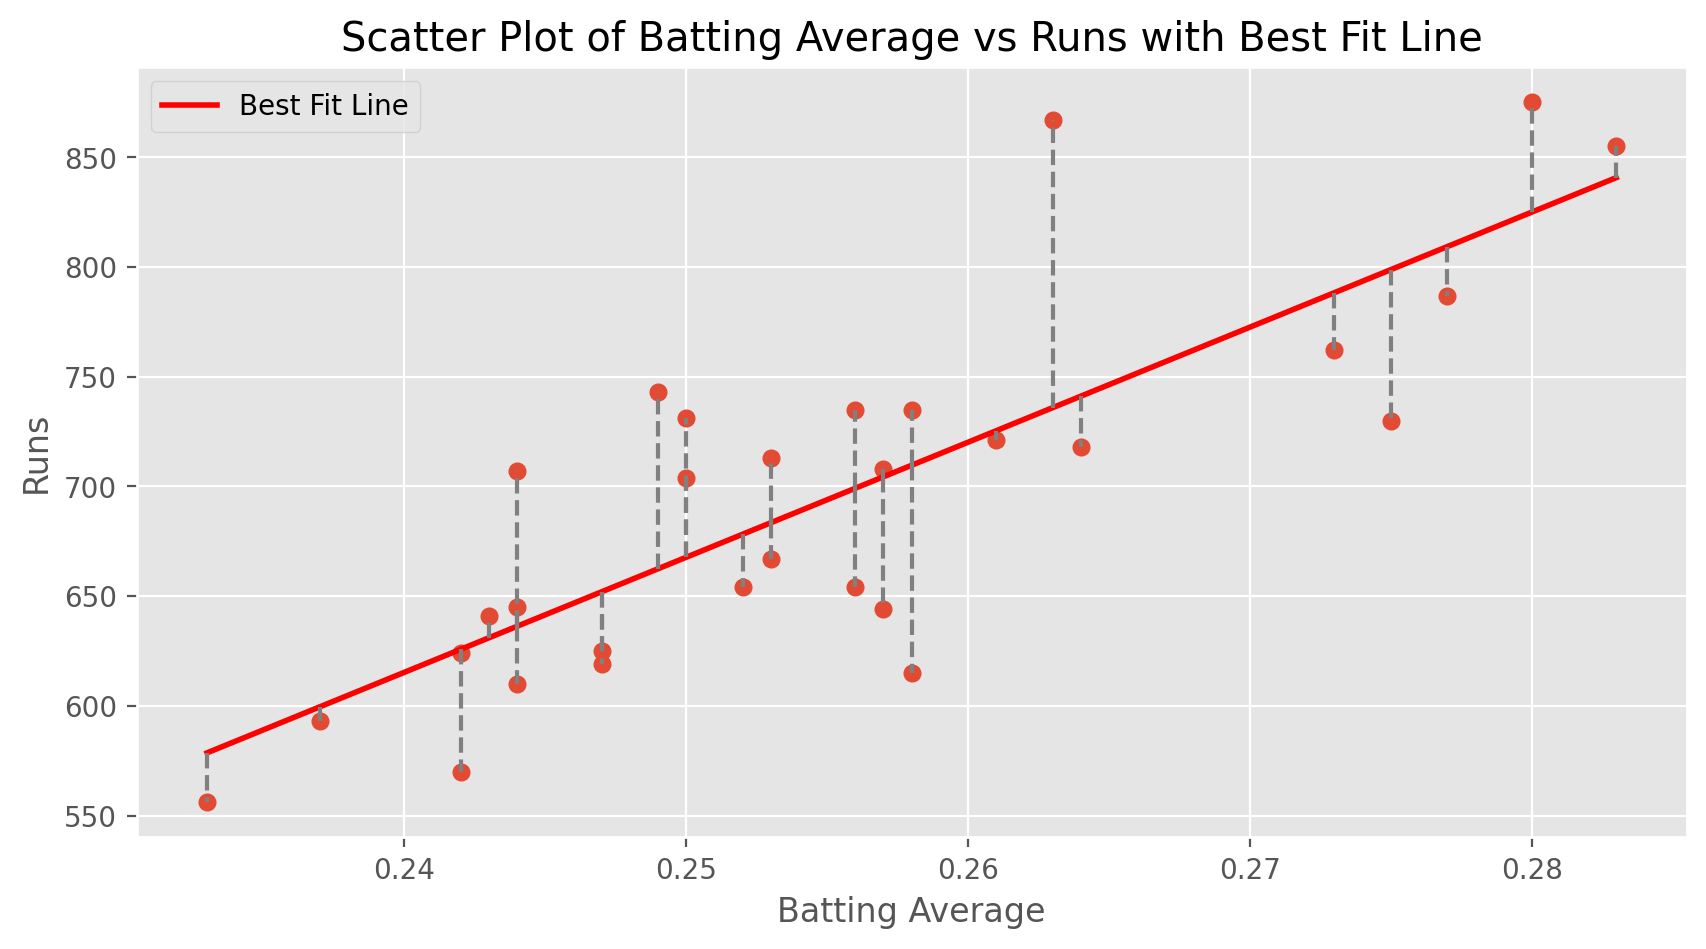

In [240]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'bat_avg': mlb11['bat_avg'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['bat_avg']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['bat_avg'], mlb11['runs'])
plt.plot(mlb11['bat_avg'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Batting Average')
plt.ylabel('Runs')
plt.title('Scatter Plot of Batting Average vs Runs with Best Fit Line')
plt.grid(True)

#Plot residual lines
for i in range(len(mlb11)):
    plt.plot([mlb11['bat_avg'][i], mlb11['bat_avg'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

plt.legend()
plt.show()

##### Residual Histogram

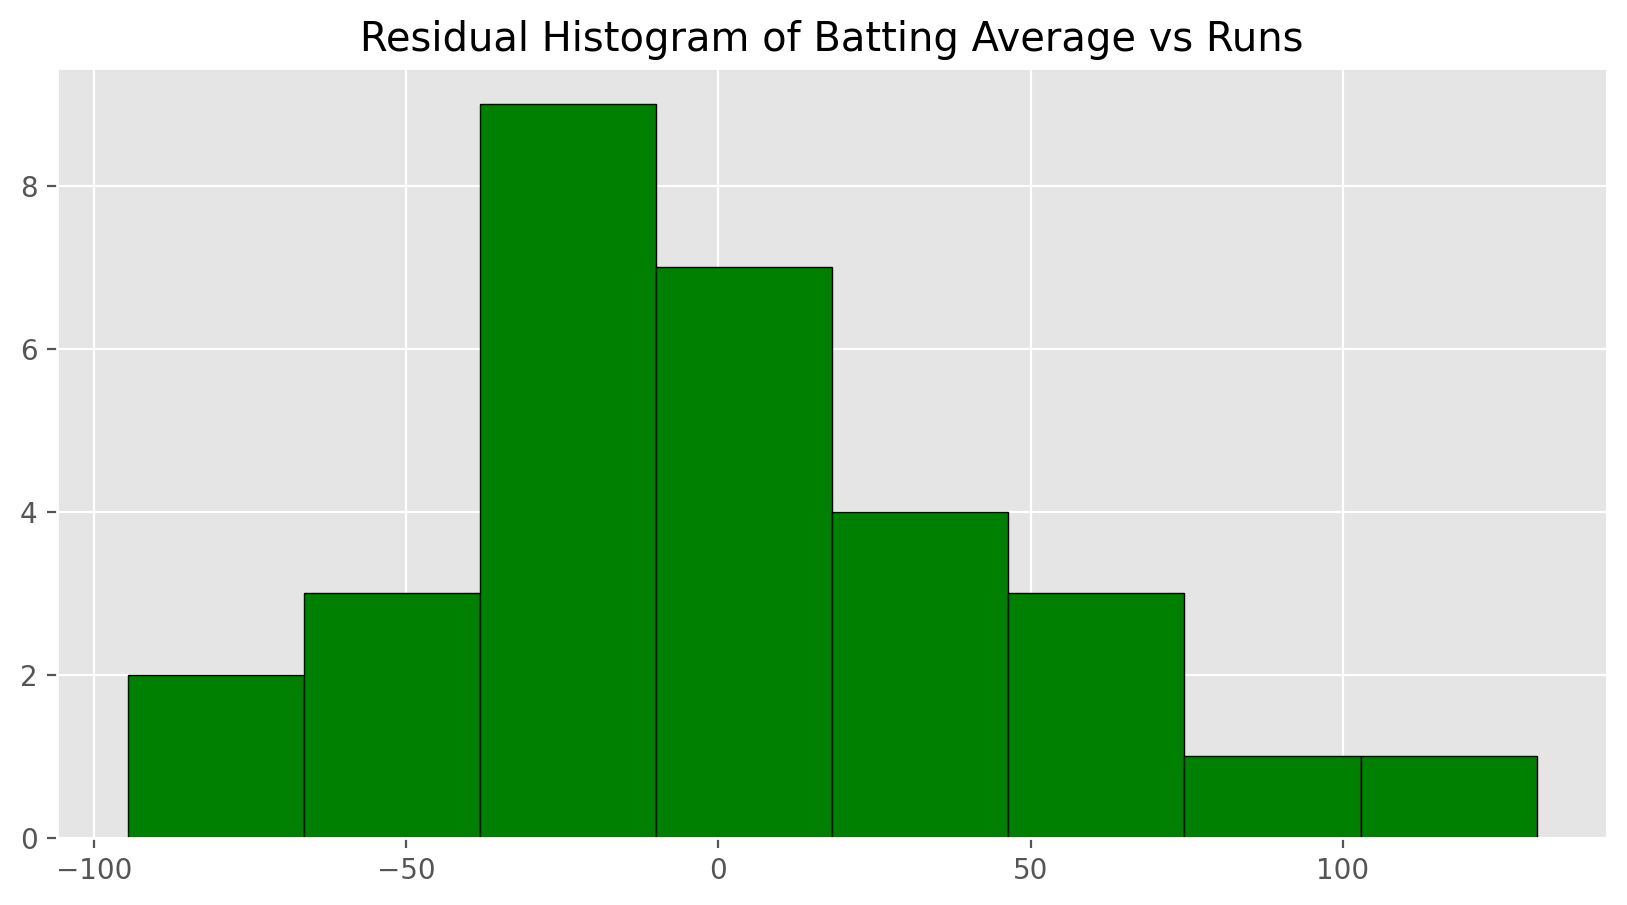

In [241]:

plt.hist(residuals, bins = 8, edgecolor = "black", color= 'green')
plt.title("Residual Histogram of Batting Average vs Runs")
plt.show();

Batting average (bat_avg) displays a robust positive correlation with runs, as evidenced by a correlation coefficient of 0.81. Additionally, the high R-squared value of 0.6561 further underscores the effectiveness of batting average in explaining and predicting the variance in runs, emphasizing its substantial impact on the relationship between these variables.

#### Q4.Now examine the three newer variables. These are the statistics used by the author of Moneyball to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we've analyzed, which seems to be the best predictor of runs? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?


In [242]:

mlb11 = pd.read_csv("mlb11.csv")
data = {
    'new_onbase': mlb11['new_onbase'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ new_onbase"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ new_onbase (m8):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['new_onbase'].corr(mlb11['runs'])} ")

data = {
    'new_slug': mlb11['new_slug'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ new_slug"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ new_slug (m9):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['new_slug'].corr(mlb11['runs'])}")

data = {
    'new_obs': mlb11['new_obs'],
    'runs': mlb11['runs']
}
formula_string = "runs ~ new_obs"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(F"Rsquared for runs ~ new_obs (m10):  {round(model_fitted.rsquared * 100, 2) }% and Correlation : {mlb11['new_obs'].corr(mlb11['runs'])}")

Rsquared for runs ~ new_onbase (m8):  84.91% and Correlation : 0.9214690724306156 
Rsquared for runs ~ new_slug (m9):  89.69% and Correlation : 0.9470324009291545
Rsquared for runs ~ new_obs (m10):  93.49% and Correlation : 0.9669162974900227


Ans:- 
- In examining the statistical observations of the remaining variables:
  - The variable "new_obs" stands out with an impressive R-squared value of 0.9349 and a correlation of 0.96, marking it as the highest among all the variables.
  - Following closely is the variable "new_slug" with an R-squared value of 0.8969 and a correlation of 0.9470, establishing it as the second-best predictor.
- Both "new_obs" and "new_slug" are utilized as predictors, and their strong R-squared values and correlations affirm their effectiveness, collectively making them the most accurate predictors in the analysis.

#### Q5. Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs

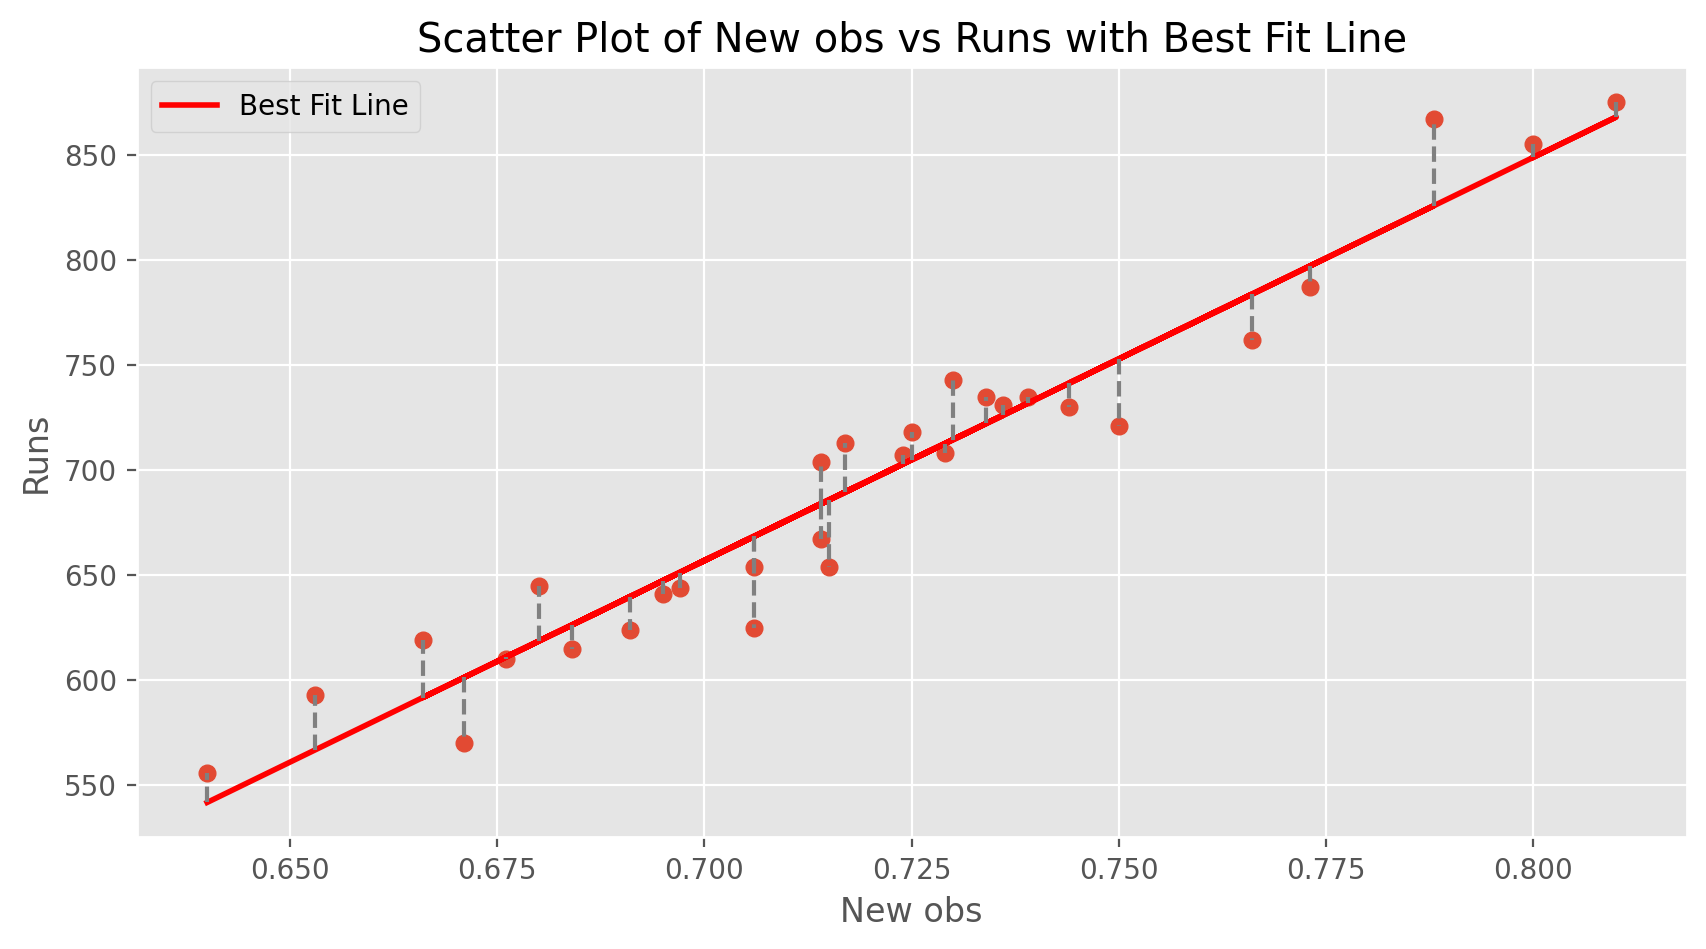

In [243]:




import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
mlb11 = pd.read_csv("mlb11.csv")
data = {
    'new_obs': mlb11['new_obs'],
    'runs': mlb11['runs']
}

mlb11 = pd.DataFrame(data)

# Fit a linear regression model
X = mlb11[['new_obs']]
y = mlb11['runs']
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plotting
plt.scatter(mlb11['new_obs'], mlb11['runs'])
plt.plot(mlb11['new_obs'], y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('New obs')
plt.ylabel('Runs')
plt.title('Scatter Plot of New obs vs Runs with Best Fit Line')
plt.grid(True)

#Plot residual lines
for i in range(len(mlb11)):
    plt.plot([mlb11['new_obs'][i], mlb11['new_obs'][i]], [y_pred[i], mlb11['runs'][i]], color='gray', linestyle='--')

plt.legend()
plt.show()

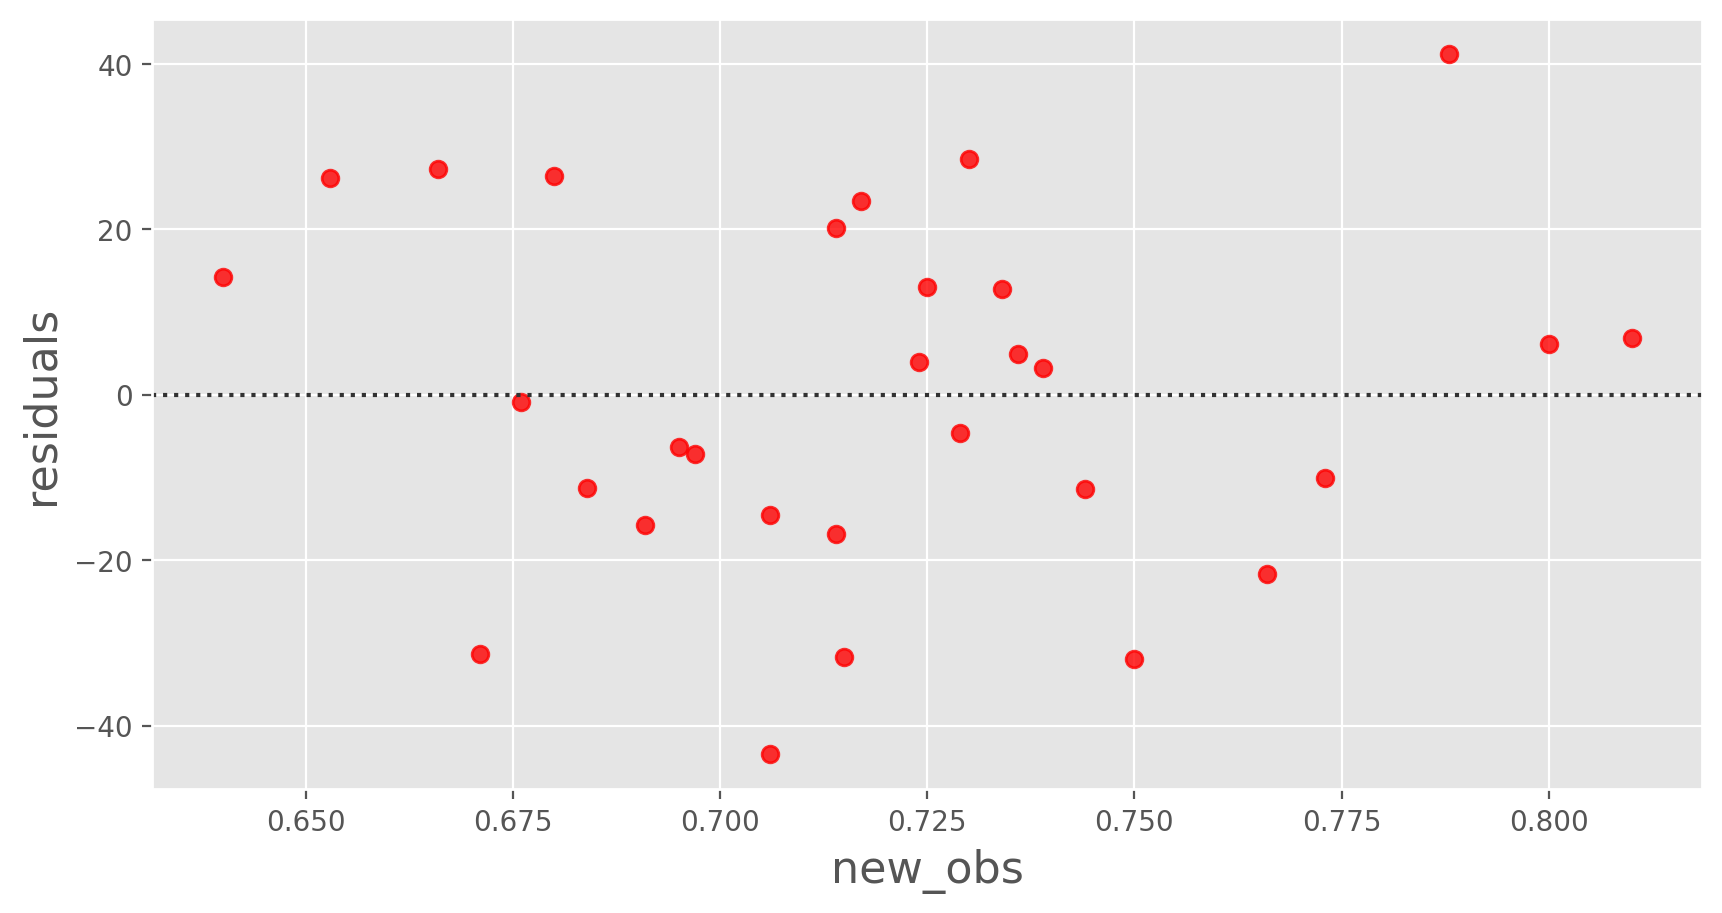

In [244]:
import seaborn as sns

sns.residplot(x=mlb11['new_obs'], y=residuals, color='red')
plt.xlabel('new_obs', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

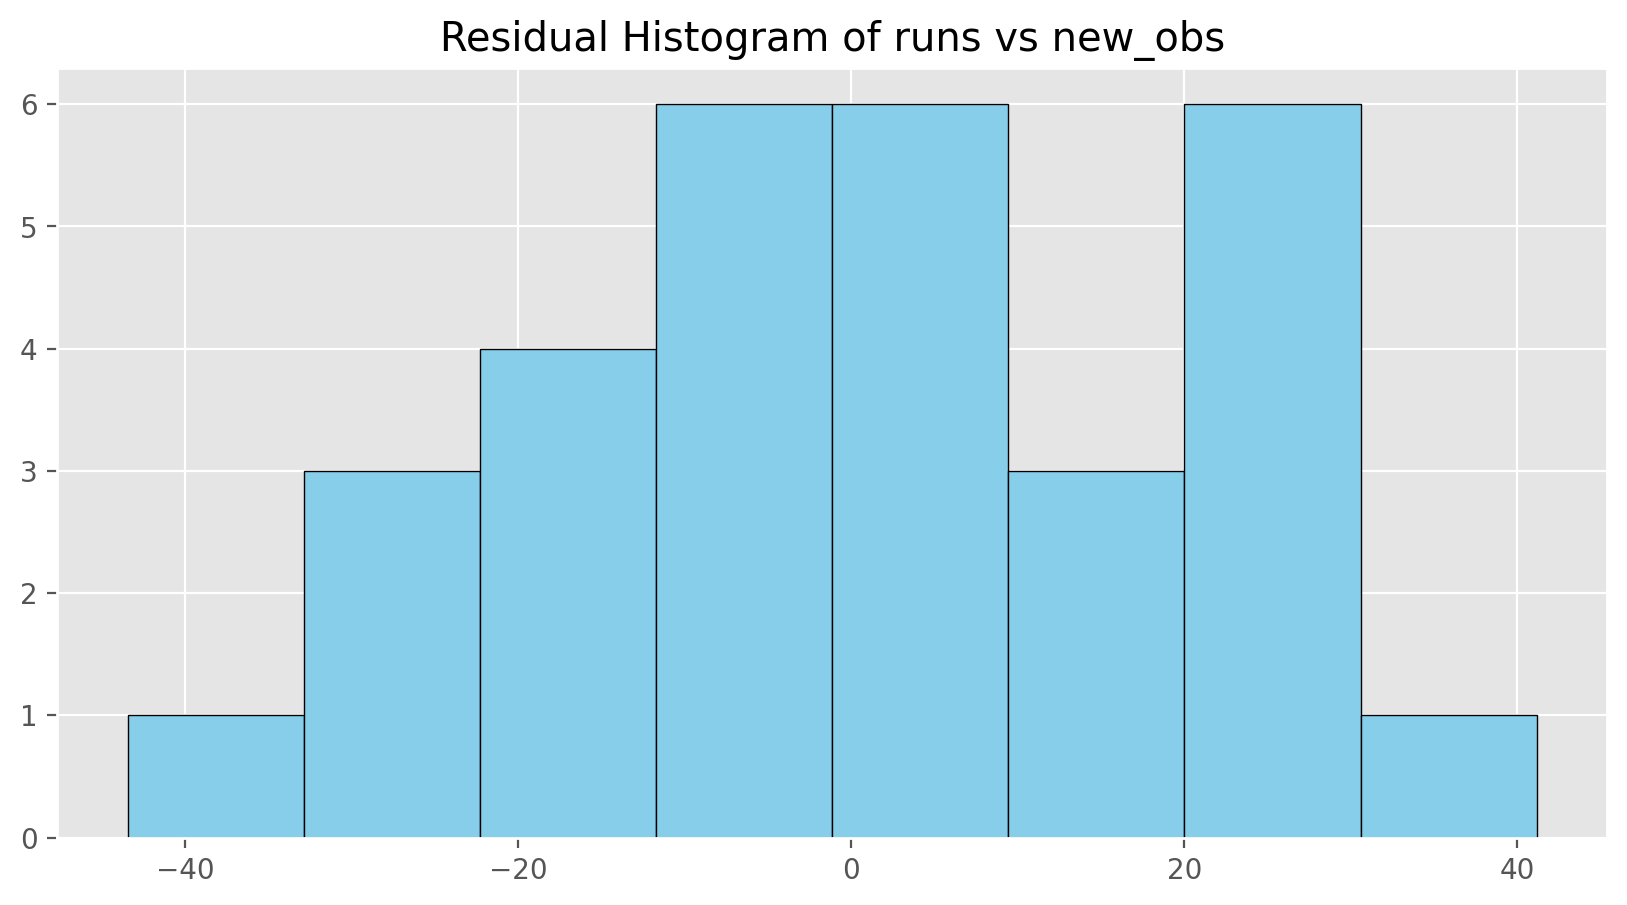

In [246]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8, edgecolor = "black", color= 'skyblue')
plt.title("Residual Histogram of runs vs new_obs")
plt.show();

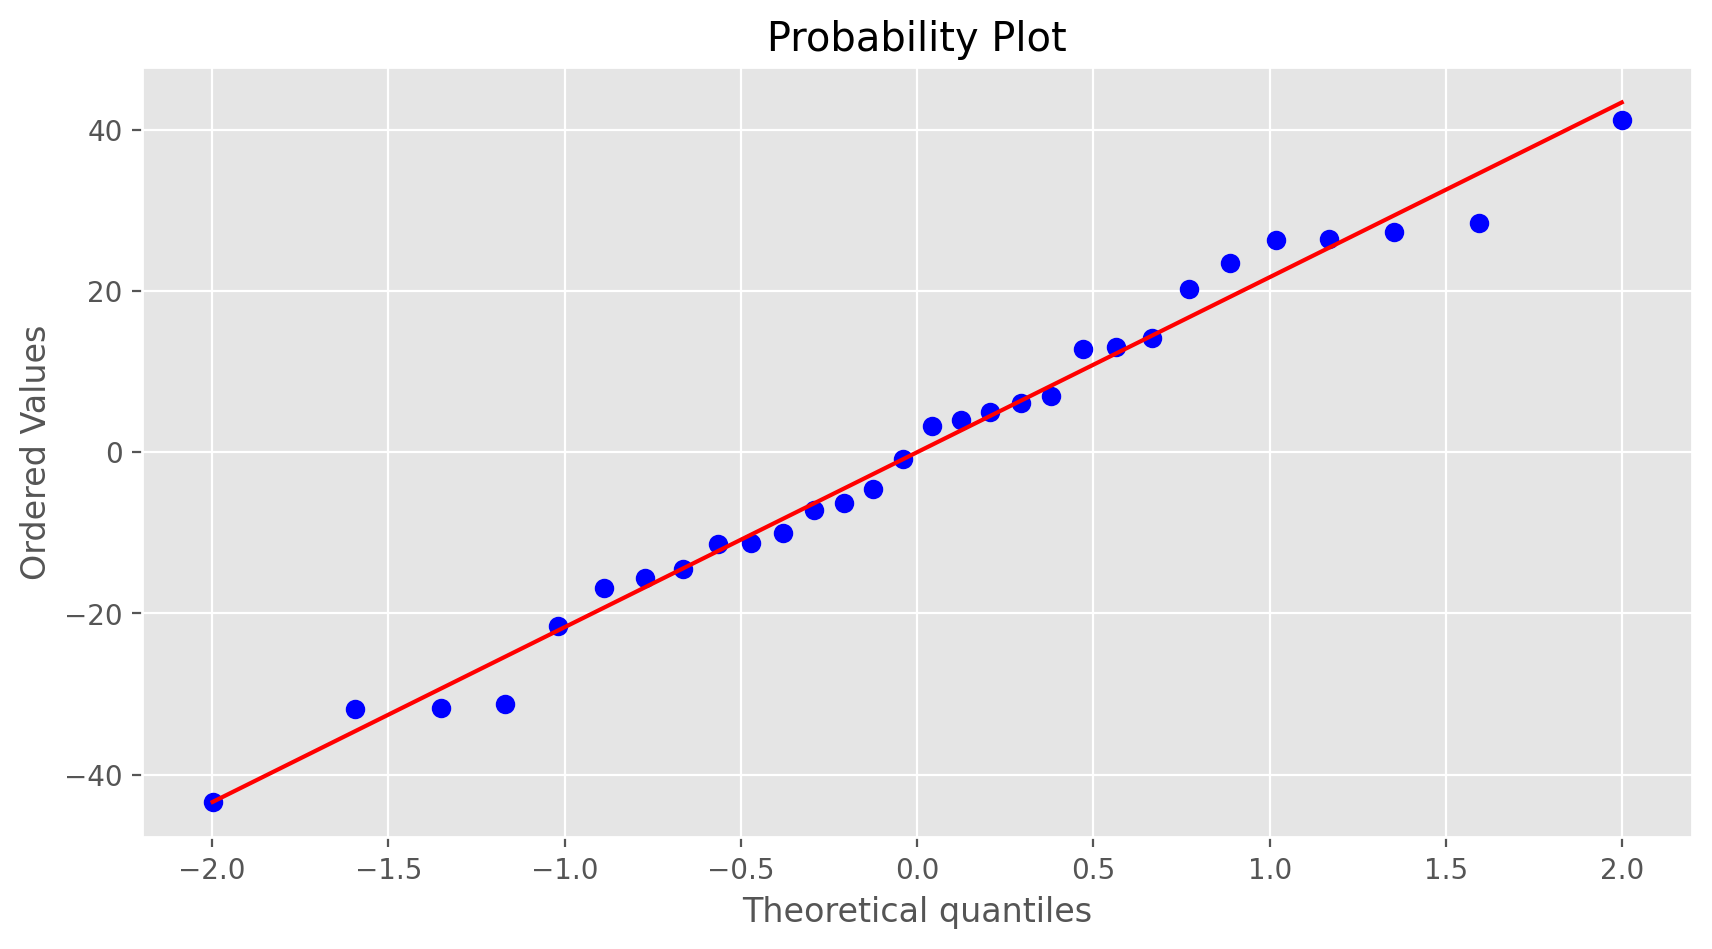

In [247]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

##### From both histogram and probalility plot we can observe that is fairly normal distribution and it is evident that condition constant variability has been met.